In [677]:
import calendar
import datetime as dt
from matplotlib import dates as mdates, pyplot as plt, style as style
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns

In [678]:
tk_data = pd.read_csv('data/train_revised.csv')
tk_data

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49
...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49


## <font color ='cyan'> Missing Numbers/Null Values </font>

<AxesSubplot:>

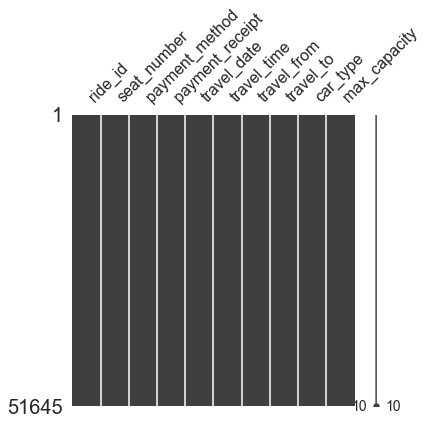

In [679]:
#graph of missing numbers
msno.matrix(tk_data, figsize=(5,5))

In [680]:
#percentage of null values
tk_data.isnull().sum()/tk_data.shape[0]

ride_id            0.0
seat_number        0.0
payment_method     0.0
payment_receipt    0.0
travel_date        0.0
travel_time        0.0
travel_from        0.0
travel_to          0.0
car_type           0.0
max_capacity       0.0
dtype: float64

## <font color ='cyan'> Data Type Manipulation </font>

In [681]:
#creates our datetime column so that we can graph these easier later
tk_data['time'] = pd.to_datetime(tk_data['travel_date'] + " "+ tk_data['travel_time'], format='%d-%m-%y %H:%M')

#creates the categorical col (Day of the Week)
cat_type = pd.CategoricalDtype(list(calendar.day_name), ordered=True)
tk_data['day_of_week'] = pd.Categorical.from_codes(tk_data['time'].dt.day_of_week, dtype=cat_type)

tk_data

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,time,day_of_week
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,2017-10-17 07:15:00,Tuesday
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,2017-11-19 07:12:00,Sunday
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,2017-11-26 07:05:00,Sunday
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,2017-11-27 07:10:00,Monday
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,2017-11-27 07:12:00,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49,2018-04-20 08:00:00,Friday
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49,2018-04-20 08:00:00,Friday
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49,2018-04-20 08:00:00,Friday
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49,2018-04-20 07:08:00,Friday


In [682]:
#dropping unnecessary data columns
#dont need this because we are figuring out ticket sales
tk_data.drop(columns=['seat_number', 'payment_receipt', 'travel_to', 'travel_date', 'travel_time'], inplace=True)

## <font color ='cyan'> Overall EDA </font>

In [683]:
#finds the earliest and latest times
tk_data.sort_values(by='time')
#earliest point in data is 10/17/2017
#last point in data is 4/20/2018

,ride_id,payment_method,travel_from,car_type,max_capacity,time,day_of_week
0,1442,Mpesa,Migori,Bus,49,2017-10-17 07:15:00,Tuesday
51644,14304,Mpesa,Kisii,Bus,49,2017-11-14 05:10:00,Tuesday
1,5437,Mpesa,Migori,Bus,49,2017-11-19 07:12:00,Sunday
2,5710,Mpesa,Keroka,Bus,49,2017-11-26 07:05:00,Sunday
51195,13761,Mpesa,Kisii,shuttle,11,2017-11-27 05:00:00,Monday
...,...,...,...,...,...,...,...
51611,13812,Mpesa,Ndhiwa,Bus,49,2018-04-20 23:10:00,Friday
51615,13812,Mpesa,Ndhiwa,Bus,49,2018-04-20 23:10:00,Friday
51555,13794,Mpesa,Rodi,Bus,49,2018-04-20 23:10:00,Friday
51552,13802,Mpesa,Rongo,Bus,49,2018-04-20 23:10:00,Friday


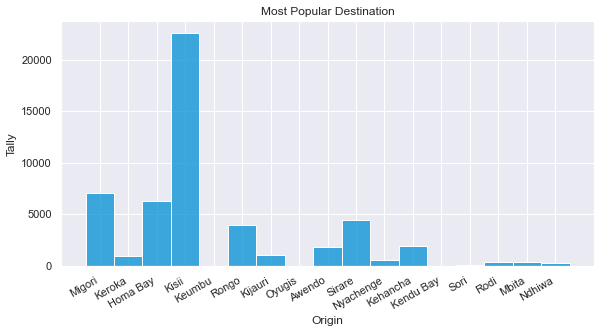

In [684]:
#plots the most popular destination
sns.set_style('darkgrid')
plt.figure(figsize=(8.5,5))
p = sns.histplot(data=tk_data, x='travel_from', discrete=True)
p.set(xlabel='Origin', title='Most Popular Destination', ylabel='Tally')
p.get_figure().autofmt_xdate()

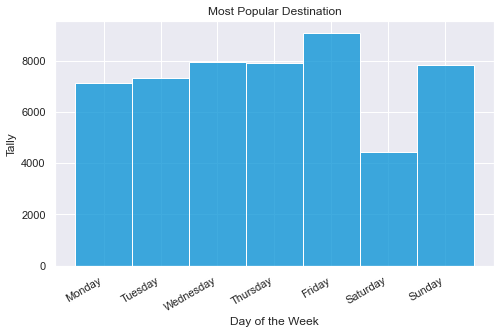

In [685]:
#most popular destination by tally
plt.figure(figsize=(7,5))
p = sns.histplot(data=tk_data, x='day_of_week')
p.set(xlabel='Day of the Week', title='Most Popular Destination', ylabel='Tally')
p.get_figure().autofmt_xdate()

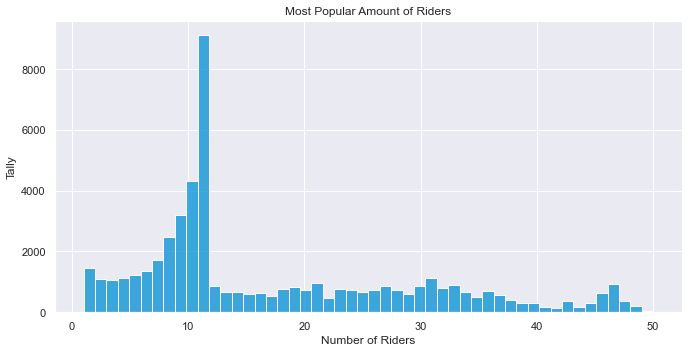

In [686]:
#most popular amount of riders
tk_data.ride_id.nunique() #6249 unique rides
tk_data.sort_values(['ride_id'], inplace=True)
tk_ridecount = tk_data.groupby('ride_id')['ride_id'].count()
tk_data['total_riders'] = tk_data['ride_id'].map(tk_ridecount.to_dict()) #adds the column to our big function
pop = tk_data.sort_values('total_riders', ascending=False)

plt.figure(figsize=(10,5))
p = sns.histplot(data=tk_data, bins=50, x='total_riders').set(xlabel='Number of Riders', title='Most Popular Amount of Riders', ylabel='Tally')

In [699]:
#the percentage of seats taken up
seats_taken = tk_data.groupby('ride_id').apply(lambda x: x['total_riders'] / x['max_capacity'])
print(seats_taken.mean() * 100)
seats_taken = seats_taken.reset_index().drop(columns=['level_1']).set_index(['ride_id'])
tk_data['p_seats_taken'] = tk_data['ride_id'].map(seats_taken.to_dict()[0])

59.437209679106815


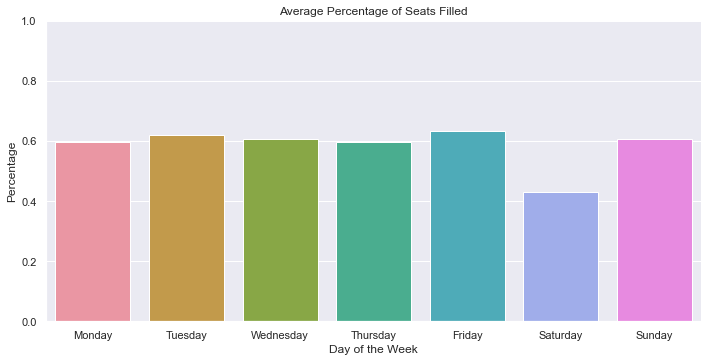

In [748]:
#the day of the week vs the percentage of seats taken

seats_mean = tk_data.groupby('day_of_week')['p_seats_taken'].mean().to_frame().reset_index()

p = sns.catplot(x="day_of_week", y="p_seats_taken", data=seats_mean, kind="bar", aspect=2)
p.set(xlabel='Day of the Week', title='Average Percentage of Seats Filled', ylabel='Percentage', ylim=(0,1))

## <font color ='cyan'> By Car Type </font>

In [692]:
#we are finding out the most popular amount of riders by type of car
bus_tk = tk_data[tk_data.car_type == 'Bus']
shuttle_tk = tk_data[tk_data.car_type == 'shuttle']

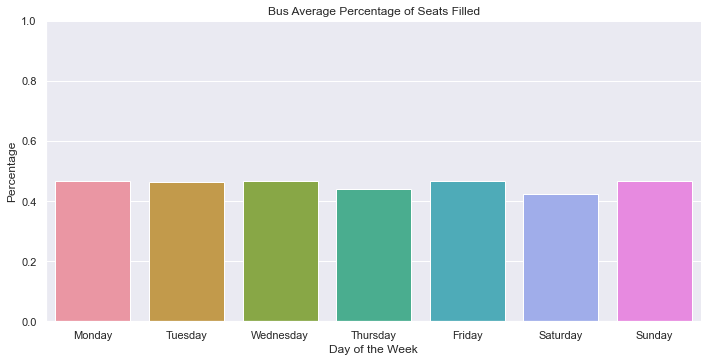

In [752]:
#percentage of seats taken on a bus per day of the week
bus_seats_mean = bus_tk.groupby('day_of_week')['p_seats_taken'].mean().to_frame().reset_index()
p = sns.catplot(x="day_of_week", y="p_seats_taken", data=bus_seats_mean, kind="bar", aspect=2)
p.set(xlabel='Day of the Week', title='Bus Average Percentage of Seats Filled', ylabel='Percentage', ylim=(0,1))

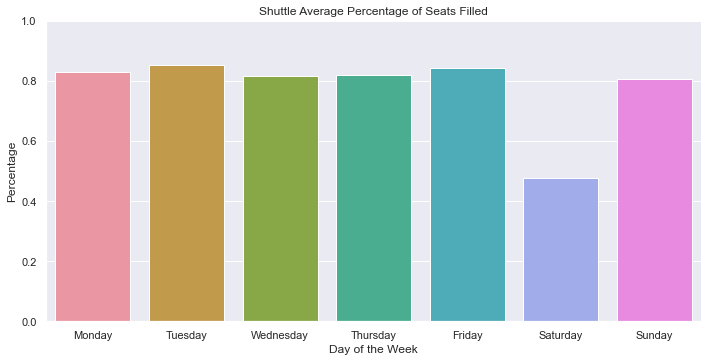

In [754]:
#percentage of seats filled on a shuttle per day of the week
shuttle_seats_mean = shuttle_tk.groupby('day_of_week')['p_seats_taken'].mean().to_frame().reset_index()
p = sns.catplot(x="day_of_week", y="p_seats_taken", data=shuttle_seats_mean, kind="bar", aspect=2)
p.set(xlabel='Day of the Week', title='Shuttle Average Percentage of Seats Filled', ylabel='Percentage', ylim=(0,1))

## By Location

In [773]:
locs = tk_data.travel_from.unique()
migori = tk_data[tk_data.travel_from == locs[0]]
keroka = tk_data[tk_data.travel_from == locs[1]]
homa_bay = tk_data[tk_data.travel_from == locs[2]]
kisii = tk_data[tk_data.travel_from == locs[3]]
keumbu = tk_data[tk_data.travel_from == locs[4]]
rongo = tk_data[tk_data.travel_from == locs[5]]
kijauri = tk_data[tk_data.travel_from == locs[6]]
oyugis = tk_data[tk_data.travel_from == locs[7]]
awendo = tk_data[tk_data.travel_from == locs[8]]
sirare = tk_data[tk_data.travel_from == locs[9]]
nyachenge = tk_data[tk_data.travel_from == locs[10]]
kehancha = tk_data[tk_data.travel_from == locs[11]]
kendu_bay = tk_data[tk_data.travel_from == locs[12]]
sori = tk_data[tk_data.travel_from == locs[13]]
rodi = tk_data[tk_data.travel_from == locs[14]]
mbita = tk_data[tk_data.travel_from == locs[15]]
ndhiwa = tk_data[tk_data.travel_from == locs[16]]
the_locs = [migori, keroka, homa_bay, kisii, keumbu, rongo, kijauri, oyugis, awendo, 
        sirare, nyachenge, kehancha, kendu_bay, sori, rodi, mbita, ndhiwa]


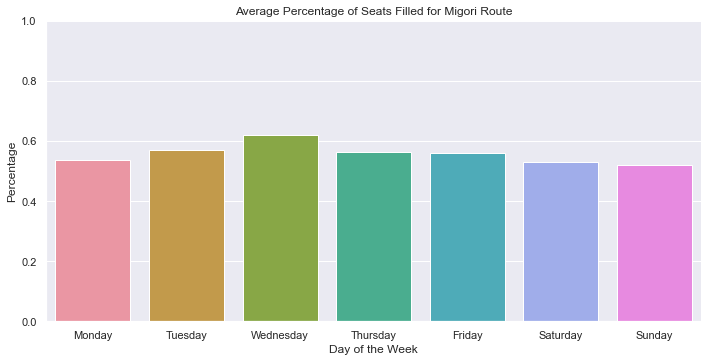

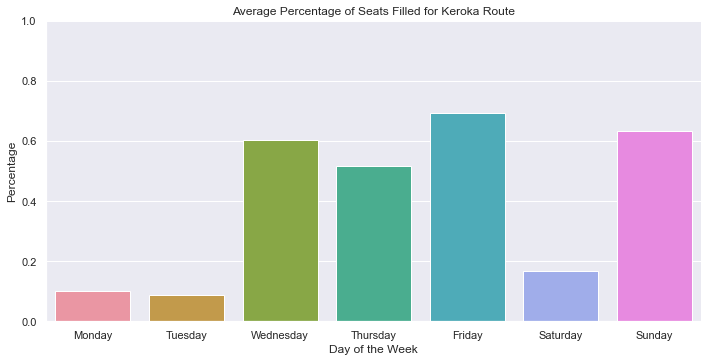

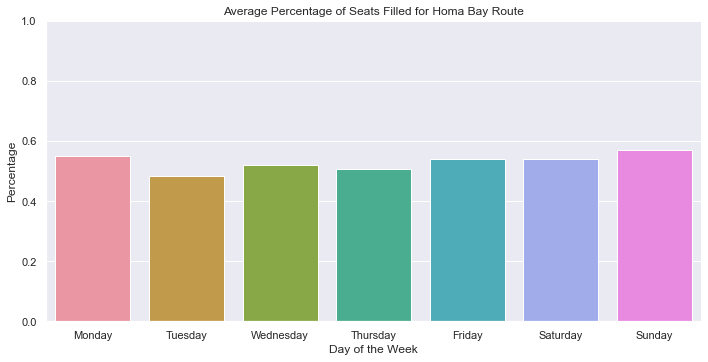

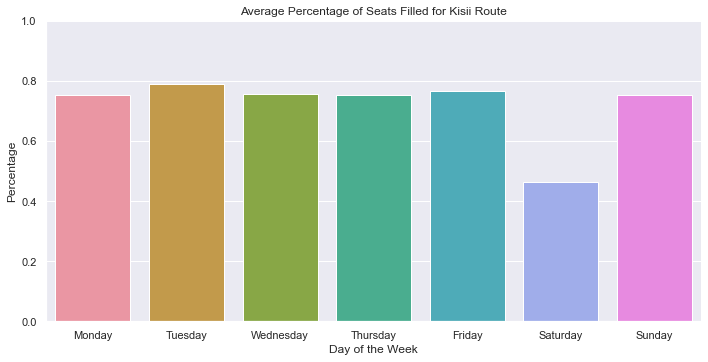

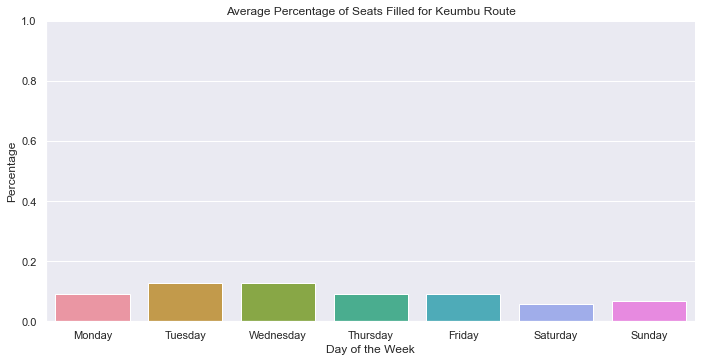

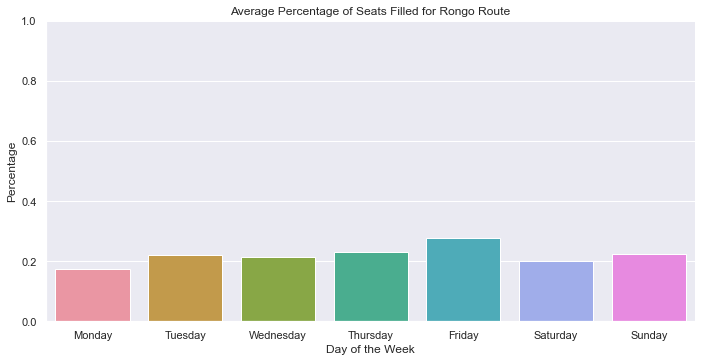

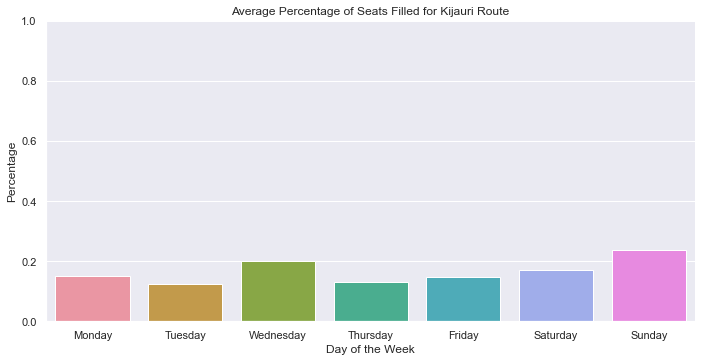

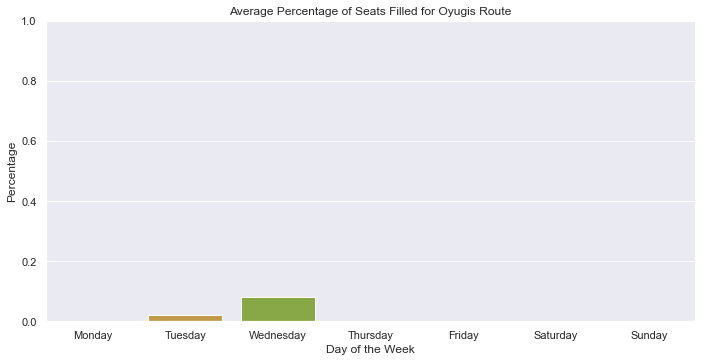

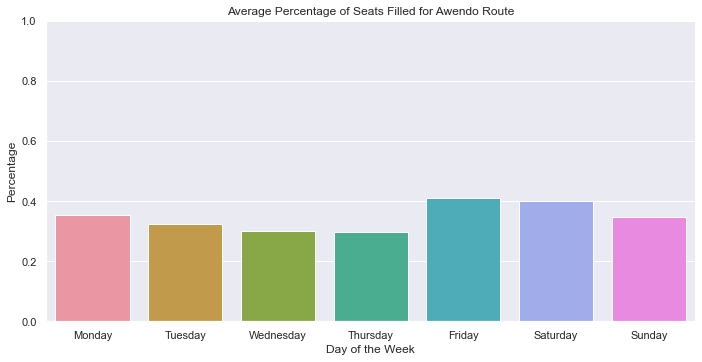

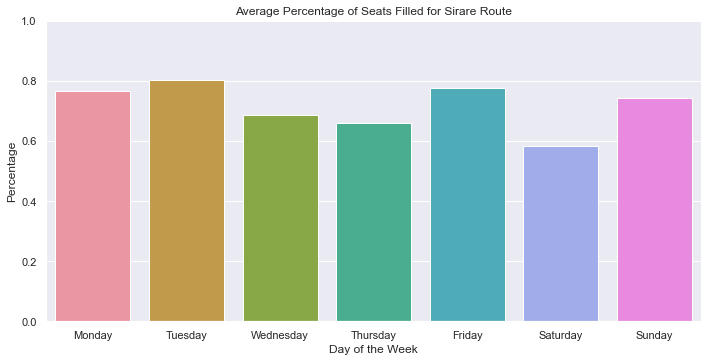

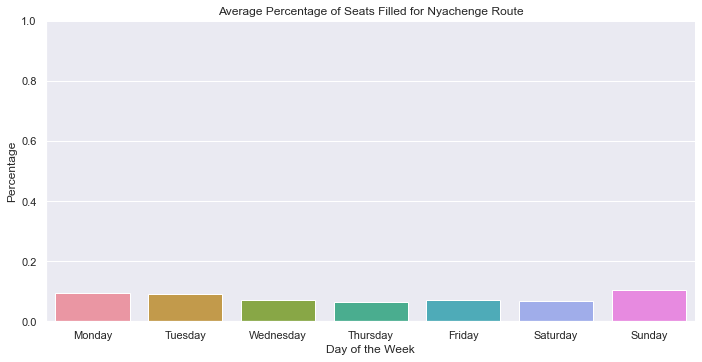

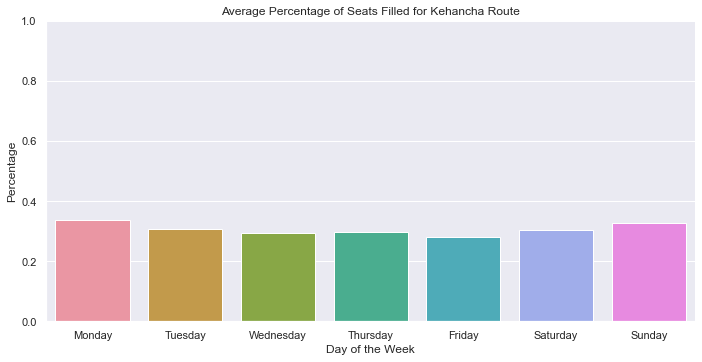

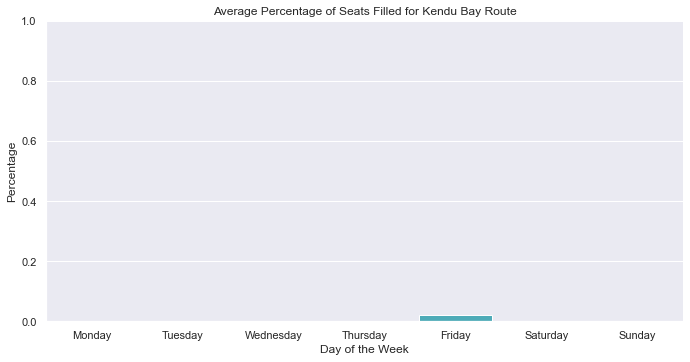

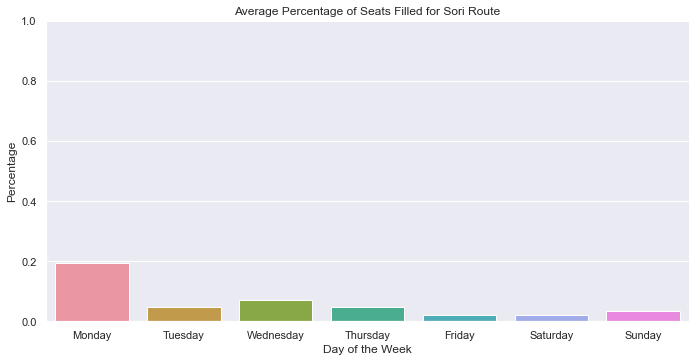

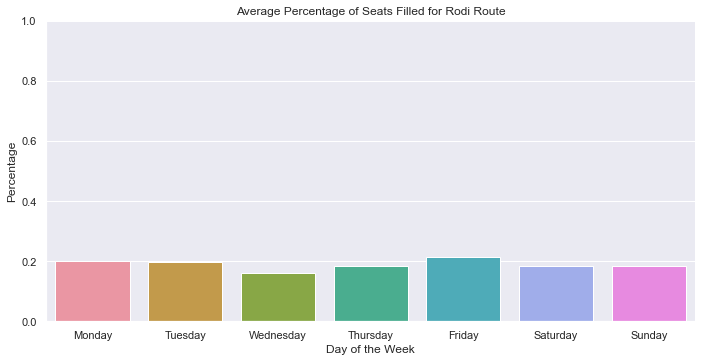

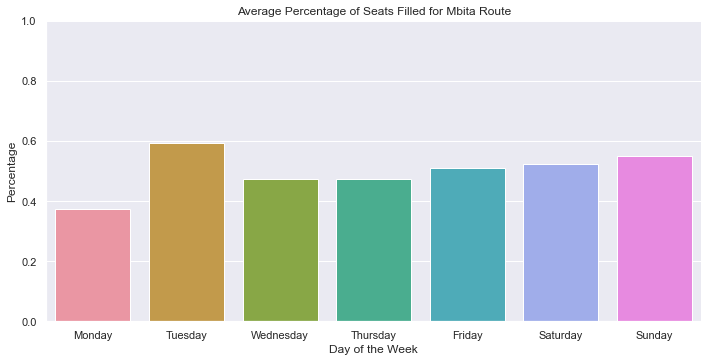

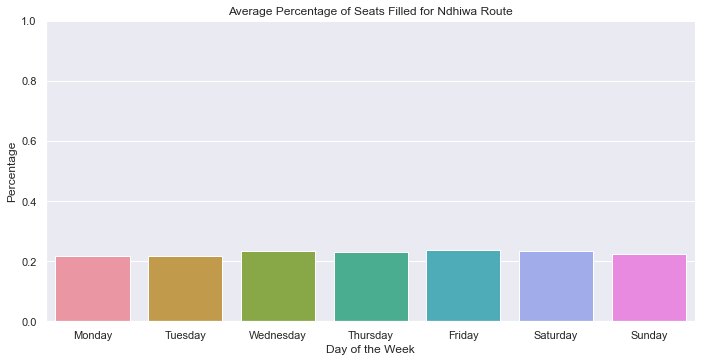

In [777]:
for i,j in zip(the_locs, locs):
    seats_taken_i = i.groupby('day_of_week')['p_seats_taken'].mean().to_frame().reset_index()
    p = sns.catplot(x="day_of_week", y="p_seats_taken", data=seats_taken_i, kind="bar", aspect=2)
    p.set(xlabel='Day of the Week', title=f'Average Percentage of Seats Filled for {j} Route', ylabel='Percentage', ylim=(0,1))

## By Payment Method

In [674]:
#we figure out if there are any cash payments
cash_payments = tk_data[~(tk_data.payment_method == 'Mpesa')] #113 cash payments
mpesa_payments = tk_data[(tk_data.payment_method == 'Mpesa')] # 51532 mpesa payments
mpesa_payments.shape[0] / tk_data.shape[0]
#99.7% of payments are in mpesa
mpesa_payments.ride_id.nunique() #6225
6225 / 6249 #99.6% of the unique rides were paid in Mpesa

0.9961593855016803